In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import backend as K

In [2]:
import pandas as pd
train_data = pd.read_csv('/data/yingfei/cancer_data/train_data.csv')
test_data = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

In [3]:
from sklearn.model_selection import train_test_split
with open('train_celllines_v1_1111.txt') as f:
    train_index = list(map(lambda x: x[:-1],f.readlines()))
train_set_index, val_set_index = train_test_split(train_index, test_size=0.1, random_state=42)

In [4]:
train_data = train_data.loc[train_data['auc'] >= 0]
train_data = train_data.reset_index(drop = True)
train_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000001,JW-7-24-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.778432
1,ACH-000001,KIN001-260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.951321
2,ACH-000001,NSC-87877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.840287
3,ACH-000001,PLX-4720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.936410
4,ACH-000001,ERK5-IN-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.891908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203913,ACH-001716,KIN001-236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.956865
203914,ACH-001716,LUMINESPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975168
203915,ACH-001716,NUTLIN-3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.871995
203916,ACH-001716,SGC0946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975417


In [5]:
train_data_new = train_data.loc[train_data.ARXSPAN_ID.isin(train_set_index)].copy()
train_data_new = train_data_new.reset_index(drop = True)
val_data_new = train_data.loc[train_data.ARXSPAN_ID.isin(val_set_index)].copy() 
val_data_new = val_data_new.reset_index(drop = True)

In [6]:
test_data_new = test_data.loc[test_data['auc'] >= 0]
test_data_new = test_data_new.reset_index(drop = True)
test_data_new

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000802,JW-7-24-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.528562
1,ACH-000802,KIN001-260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.930958
2,ACH-000802,NSC-87877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.759249
3,ACH-000802,PLX-4720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.936510
4,ACH-000802,ERK5-IN-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.823453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,ACH-000438,KIN001-266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975578
22874,ACH-000438,LUMINESPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.980529
22875,ACH-000438,NUTLIN-3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.960501
22876,ACH-000438,SGC0946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.970524


In [7]:
### drug features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_padel_features = train_data_new[train_data_new.columns[-2326:-1]]
train_padel_features = scaler.fit_transform(train_padel_features)
train_padel_features = pd.DataFrame(train_padel_features)

In [8]:
val_padel_features = val_data_new[val_data_new.columns[-2326:-1]]
val_padel_features = scaler.transform(val_padel_features)
val_padel_features = pd.DataFrame(val_padel_features)

In [9]:
test_padel_features = test_data_new[test_data_new.columns[-2326:-1]]
test_padel_features = scaler.transform(test_padel_features)
test_padel_features = pd.DataFrame(test_padel_features)

In [10]:
### mutation (cell line features)
gene_embeddings_324 = np.load('GIT_embedding/gene_emb_finetune_324.npy')

In [11]:
import json

f = open('GIT_embedding/new_idx2sga.txt')

new_idx2sga = json.load(f)
new_idx2sga = {int(key):value for key,value in new_idx2sga.items()}
new_sga2idx = {new_idx2sga[i]:i for i in new_idx2sga.keys()}

In [13]:
train_encoded_data = []
for i in range(len(train_data_new)):
    cell_line_data = []
    for j in train_data_new.columns[2:-2326]:
        if train_data_new[j][i] == 1:
            cell_line_data.append(int(new_sga2idx[j]))
    train_encoded_data.append(cell_line_data)

In [14]:
train_encoded_data[0]

[192, 68, 72, 129, 8, 104, 246]

In [15]:
val_encoded_data = []
for i in range(len(val_data_new)):
    cell_line_data = []
    for j in val_data_new.columns[2:-2326]:
        if val_data_new[j][i] == 1:
            cell_line_data.append(int(new_sga2idx[j]))
    val_encoded_data.append(cell_line_data)

In [16]:
val_encoded_data[0]

[177, 266, 8, 265]

In [17]:
test_encoded_data = []
for i in range(len(test_data_new)):
    cell_line_data = []
    for j in test_data_new.columns[2:-2326]:
        if test_data_new[j][i] == 1:
            cell_line_data.append(int(new_sga2idx[j]))
    test_encoded_data.append(cell_line_data)

In [18]:
test_encoded_data[0]

[31, 148, 96, 68, 290, 213, 119, 255, 8]

In [19]:
print(max(list(map(lambda x: len(x), train_encoded_data))))
print(max(list(map(lambda x: len(x), val_encoded_data))))
print(max(list(map(lambda x: len(x), test_encoded_data))))

138
116
224


In [20]:
from keras_preprocessing.sequence import pad_sequences

max_length = 224
train_encoded_data_pad = pad_sequences(train_encoded_data, maxlen=max_length, padding='post')
val_encoded_data_pad = pad_sequences(val_encoded_data, maxlen=max_length, padding='post')
test_encoded_data_pad = pad_sequences(test_encoded_data, maxlen=max_length, padding='post')

In [21]:
train_label = train_data_new['auc']
print(f'Minimum train y value: {min(train_label)}, \
      Maximum train y value: {max(train_label)}')

Minimum train y value: 0.004496,       Maximum train y value: 0.999883


In [22]:
val_label = val_data_new['auc']
print(f'Minimum validation y value: {min(val_label)}, \
      Maximum validation y value: {max(val_label)}')

Minimum validation y value: 0.010477,       Maximum validation y value: 0.997684


In [23]:
test_label = test_data_new['auc']
print(f'Minimum test y value: {min(test_label)}, \
      Maximum test y value: {max(test_label)}')

Minimum test y value: 0.013524,       Maximum test y value: 0.998284


In [24]:
# load the embedding - https://blog.paperspace.com/pre-trained-word-embeddings-natural-language-processing/
embeddings_index = {}
for gene in train_data.columns[2:-2326]:
    if gene == "TERC":
        continue
    emb = gene_embeddings_324[int(new_sga2idx[gene])+1]
    embeddings_index[gene] = emb

print('Found %s word vectors.' % len(embeddings_index))

Found 323 word vectors.


In [25]:
embedding_matrix = np.zeros((len(train_data.columns[2:-2326]), 512))
for gene, i in new_sga2idx.items():
    embedding_vector = embeddings_index.get(gene)
    if embedding_vector is not None:
        embedding_matrix[int(i)] = embedding_vector

In [26]:
embedding_matrix.shape

(324, 512)

In [27]:
train_padel_features = train_padel_features.to_numpy().reshape(train_padel_features.shape[0], train_padel_features.shape[1], 1)
train_encoded_data_pad = train_encoded_data_pad.reshape(train_encoded_data_pad.shape[0], train_encoded_data_pad.shape[1], 1)

val_padel_features = val_padel_features.to_numpy().reshape(val_padel_features.shape[0], val_padel_features.shape[1], 1)
val_encoded_data_pad = val_encoded_data_pad.reshape(val_encoded_data_pad.shape[0], val_encoded_data_pad.shape[1], 1)

test_padel_features = test_padel_features.to_numpy().reshape(test_padel_features.shape[0], test_padel_features.shape[1], 1)
test_encoded_data_pad = test_encoded_data_pad.reshape(test_encoded_data_pad.shape[0], test_encoded_data_pad.shape[1], 1)

In [28]:
### Train test split
# from sklearn.model_selection import train_test_split
# train_padel_features
# train_padel_features, val_padel_features, train_y, val_y = train_test_split(
#     train_padel_features, train_label, random_state = 42)

In [29]:
# train_encoded_data_pad
# train_encoded_data_pad, val_encoded_data_pad, train_y, val_y = train_test_split(
#     train_encoded_data_pad, train_label, random_state = 42)

In [43]:
### Hyperparameters set
params_lst = ["learning_rate", "batch_size", "optimizer"]
params_value_dict = {"learning_rate": [5e-5, 1e-4], 
                     "batch_size": [128], 
                     "optimizer": ['adam']}
import itertools as it

allparams = params_value_dict
combinations = it.product(*(params_value_dict[param] for param in allparams))
combinations_lst = list(combinations)
print(len(combinations_lst))

hyper_param_dict = {}
for i in range(len(combinations_lst)):
    hyper_param_dict[i] = {}
    for j in range(len(params_lst)):
        hyper_param_dict[i][params_lst[j]] = combinations_lst[i][j]

2


In [44]:
train_padel_features = np.nan_to_num(train_padel_features)
train_encoded_data_pad = np.nan_to_num(train_encoded_data_pad)
train_y = np.nan_to_num(train_label)

In [45]:
val_padel_features = np.nan_to_num(val_padel_features)
val_encoded_data_pad = np.nan_to_num(val_encoded_data_pad)
val_y = np.nan_to_num(val_label)

In [46]:
test_padel_features = np.nan_to_num(test_padel_features)
test_encoded_data_pad = np.nan_to_num(test_encoded_data_pad)
test_y = np.nan_to_num(test_label)

In [47]:
import json
from keras.models import model_from_json, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.layers import concatenate
workdir = "resnet_ht_models/emb_model_6"

model_eval_dict = {}
model_dict = {}
training_epochs = 10
model_ht_history = {}

for i in hyper_param_dict:
    params_dict = hyper_param_dict[i]
    learning_rate=params_dict["learning_rate"] 
    batch_size=params_dict["batch_size"] 
    opt_name=params_dict["optimizer"]
    
    # hyper parameters
    num_classes = 1
    if opt_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate)
    else: # sgd
        optimizer = keras.optimizers.SGD(learning_rate)
    
    with K.tf.device('/GPU:0'): # model compile
        # inputs = Input(shape=(train_X.shape[1],1),name='inputs')
        
        cell_input = Input(shape=(max_length,),  name='cell_input') 
        drug_input = Input(shape=(2325,1), name='drug_input')
        emb = Embedding(output_dim=512, input_dim=324, input_length=max_length, weights = [embedding_matrix])(cell_input) 
        cell_output = Bidirectional(LSTM(128, return_sequences=True))(emb)
        cell_output = Bidirectional(LSTM(128))(cell_output)
        cell_output = tf.expand_dims(cell_output, axis=2)
        inputs = concatenate([cell_output, drug_input],axis=1) 

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)

        # model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN')
        model = Model(inputs=[cell_input , drug_input], outputs=[predictions])
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=optimizer,
                      metrics=['mse','mae'])
        
        # model training
        StartTime8 = datetime.now()
        print("StartTime :", StartTime8)
        with K.tf.device('/GPU:0'):
            # model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
            #                     validation_data=(val_X, val_y))
            model_train = model.fit({'cell_input': train_encoded_data_pad, 'drug_input': train_padel_features}, train_y, 
                                    batch_size=batch_size,epochs=training_epochs,verbose=1,
                                    validation_data=({'cell_input': val_encoded_data_pad, 
                                                      'drug_input': val_padel_features}
                                                     , val_y))

        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    model.save_weights(workdir+ f'/model_{i}_new.h5')
    with open(workdir + f'/model_architecture_{i}_new.json', 'w') as f:
        f.write(model.to_json())
        
    # evaluation
    print(f"Evaluating model {i}...")
    test_score = model.evaluate({'cell_input': test_encoded_data_pad, 'drug_input': test_padel_features}, test_y, verbose=1)
    model_ht_history[(learning_rate, batch_size)] = model
    loss, mse, mae = test_score
    print("loss=%.6f, mse=%.6f, mae=%.6f"%(loss, mse, mae))
    
    model_dict[i] = model
    model_eval_dict[i] = {"loss":loss, "mse":mse, "mae":mae}

StartTime : 2023-03-28 18:49:00.005927
Epoch 1/10
1434/1434 [==============================] - 2587s 2s/step - loss: 0.3624 - mse: 0.3624 - mae: 0.4345 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1394
Epoch 2/10
1434/1434 [==============================] - 2627s 2s/step - loss: 0.1099 - mse: 0.1099 - mae: 0.2207 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.1031
Epoch 3/10
1434/1434 [==============================] - 2704s 2s/step - loss: 0.0674 - mse: 0.0674 - mae: 0.1709 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.0850
Epoch 4/10
1434/1434 [==============================] - 2832s 2s/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1464 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.0847
Epoch 5/10
1434/1434 [==============================] - 2918s 2s/step - loss: 0.0359 - mse: 0.0359 - mae: 0.1305 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0800
Epoch 6/10
1434/1434 [==============================] - 2971s 2s/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1199 - val_lo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1434/1434 [==============================] - 2080s 1s/step - loss: 0.0271 - mse: 0.0271 - mae: 0.1185 - val_loss: 0.0146 - val_mse: 0.0146 - val_mae: 0.0766
Epoch 5/10
1434/1434 [==============================] - 2125s 1s/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1038 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0752
Epoch 6/10
 639/1434 [============>.................] - ETA: 18:58 - loss: 0.0195 - mse: 0.0195 - mae: 0.0986

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1434/1434 [==============================] - 2143s 1s/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0844 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0739
EndTime : 2023-03-29 08:36:36.358135
Evaluating model 1...
715/715 [==============================] - 190s 265ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0804
loss=0.017243, mse=0.017243, mae=0.080404


In [48]:
min_mse = 10
bst_model_id_lst = []
for i in model_eval_dict:
    if model_eval_dict[i]['mse'] < min_mse:
        bst_model_id_lst = []
        bst_model_id_lst.append(i)
        min_mse = model_eval_dict[i]['mse']
    elif model_eval_dict[i]['mse'] == min_mse:
        bst_model_id_lst.append(i)

In [49]:
idx = bst_model_id_lst[0]
idx

1

In [50]:
model_eval_dict[idx]

{'loss': 0.01724287122488022,
 'mse': 0.01724287122488022,
 'mae': 0.08040374517440796}

In [51]:
best_model = model_dict[idx]

In [52]:
hyper_param_dict[idx]

{'learning_rate': 0.0001, 'batch_size': 128, 'optimizer': 'adam'}

In [53]:
best_model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(0.0001),
                  metrics=['mse','mae'])

In [54]:
test_eval = best_model.evaluate({'cell_input': test_encoded_data_pad, 'drug_input': test_padel_features}, test_y, verbose=1)

715/715 [==============================] - 199s 269ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0804


In [55]:
import matplotlib
from matplotlib import pyplot as plt

715/715 [==============================] - 194s 266ms/step


Text(0, 0.5, 'predicted_AUC_value')

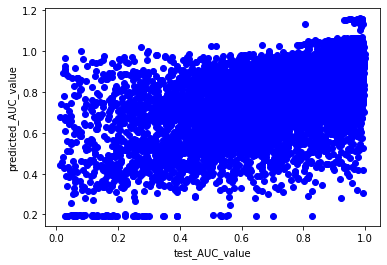

In [56]:
predicted_value = best_model.predict({'cell_input': test_encoded_data_pad, 'drug_input': test_padel_features})
plt.scatter(test_y,predicted_value,c='blue')
plt.xlabel('test_AUC_value')
plt.ylabel('predicted_AUC_value')

In [57]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_y)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [58]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.13131210085552164


In [59]:
mae = (np.abs(b[0]-a[0])).sum()
mae / len(b)

0.08040372701482783

In [60]:
mse

0.017242867831090684

In [61]:
from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)

0.4873033198558928


In [63]:
len(predicted_value)

22878

In [64]:
eval_data.shape

(26565, 3)

In [65]:
full_test = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

full_test = full_test[['ARXSPAN_ID', 'DRUG_NAME']]
eval_data = test_data_new[['ARXSPAN_ID', 'DRUG_NAME', 'auc']].copy()
eval_data['pred_auc'] = predicted_value
eval_data

,ARXSPAN_ID,DRUG_NAME,auc,pred_auc
0,ACH-000802,JW-7-24-1,0.528562,0.704233
1,ACH-000802,KIN001-260,0.930958,0.951897
2,ACH-000802,NSC-87877,0.759249,0.871089
3,ACH-000802,PLX-4720,0.936510,0.959226
4,ACH-000802,ERK5-IN-1,0.823453,0.847080
...,...,...,...,...
22873,ACH-000438,KIN001-266,0.975578,0.771698
22874,ACH-000438,LUMINESPIB,0.980529,0.984305
22875,ACH-000438,NUTLIN-3A,0.960501,0.926544
22876,ACH-000438,SGC0946,0.970524,0.978690


In [66]:
full_test['comb'] = full_test.ARXSPAN_ID + full_test.DRUG_NAME
eval_data['comb'] = eval_data.ARXSPAN_ID + eval_data.DRUG_NAME
eval_data = pd.merge(full_test, eval_data, on = ['ARXSPAN_ID', 'DRUG_NAME'], how = 'left')

In [67]:
eval_data_arr = pd.DataFrame(eval_data.ARXSPAN_ID.unique(), columns = ['ARXSPAN_ID'])
eval_data_arr['true_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr['pred_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,[],[]
1,ACH-001496,[],[]
2,ACH-000267,[],[]
3,ACH-000508,[],[]
4,ACH-001106,[],[]
...,...,...,...
64,ACH-000953,[],[]
65,ACH-000561,[],[]
66,ACH-000819,[],[]
67,ACH-000873,[],[]


In [68]:
for i in range(len(eval_data)):
    cl_id = eval_data.loc[i, 'ARXSPAN_ID']
    auc = eval_data.loc[i, 'auc']
    pred_auc =  eval_data.loc[i, 'pred_auc']
    if np.isnan(auc):
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(1)
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(1)
        continue
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(auc)
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(pred_auc)

In [69]:
pred_values = eval_data_arr.pred_auc_arr.apply(lambda x: np.array(x)).to_numpy()
true_values = eval_data_arr.true_auc_arr.apply(lambda x: np.array(x)).to_numpy()

In [70]:
### NDCG
from sklearn.metrics import ndcg_score
#ndcg_all = ndcg_score([p for p in pred_values],[t for t in true_values])
#ndcg_10 = ndcg_score([p for p in pred_values],[t for t in true_values], k = 10)
ndcg_all_values = []
ndcg_10_values = []
for i in range(len(pred_values)):
    pred_value = eval_data_arr['pred_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    true_value = eval_data_arr['true_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    ndcg_all_values.append(ndcg_score([pred_value],[true_value]))
    ndcg_10_values.append(ndcg_score([pred_value],[true_value], k = 10))
    
ndcg_all = np.mean(ndcg_all_values)
ndcg_10 = np.mean(ndcg_10_values)

print(ndcg_all)
print(ndcg_10)

0.928332493680538
0.7775600200112913


In [71]:
### Recall
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_idx_perf = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k drugs's idx
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        # step 2
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        assert gt_aucs.shape == pred_scores.shape
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 3
        # recall@k
        cur_recall_at_k = len(
            set(topk_drug_idx_pred).intersection(set(topk_drug_idx_gt))
        ) / len(set(topk_drug_idx_gt))
        dict_test_cell_line_idx_perf[cur_cell_line_idx] = cur_recall_at_k

    avg_recall_at_k = np.mean(list(dict_test_cell_line_idx_perf.values()))
    results.append((f"Recall@{top_k}", round(avg_recall_at_k, 4)))
print(results)

[('Recall@1', 0.3768), ('Recall@2', 0.3768), ('Recall@5', 0.4435), ('Recall@10', 0.4493)]


In [72]:
### AUC
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_topk_auc_sum_gt = {}
    dict_test_cell_line_topk_auc_sum_pred = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 2
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k predicted drugs' (per ground truth) aucs
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        dict_test_cell_line_topk_auc_sum_gt[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_gt]
        )
        dict_test_cell_line_topk_auc_sum_pred[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_pred]
        )

    avg_auc_topk_gt = np.mean(
        list(dict_test_cell_line_topk_auc_sum_gt.values())
    )
    avg_auc_topk_pred = np.mean(
        list(dict_test_cell_line_topk_auc_sum_pred.values())
    )

    results.append(
        (
            f"Auc@{top_k}",
            f"{round(avg_auc_topk_pred, 4)} (GT: {round(avg_auc_topk_gt, 4)})",
        )
    )

print(results)

[('Auc@1', '0.2395 (GT: 0.1198)'), ('Auc@2', '0.3133 (GT: 0.157)'), ('Auc@5', '0.3754 (GT: 0.222)'), ('Auc@10', '0.4365 (GT: 0.2893)')]


In [73]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(c.Predicted, c.Test)[0], spearmanr(c.Predicted, c.Test)[0])

0.709045994798973 0.7049355605543949
